In [2]:
from nnTrain import train_efn, arch_scan, get_data
import matplotlib.pyplot as plt
import numpy as np

# Architecture Scan

EFN AUC: 0.6199461735107794
EFN AUC: 0.638825463374376
EFN AUC: 0.6633795451375093
EFN AUC: 0.6600653087221022
EFN AUC: 0.7247163060744819
EFN AUC: 0.7229564225442953
EFN AUC: 0.7248882540993273
EFN AUC: 0.6638499901848334
EFN AUC: 0.6374948573522343
EFN AUC: 0.6970683864688804
EFN AUC: 0.7238076689185862
EFN AUC: 0.7052809573701722
EFN AUC: 0.7369758136242112
EFN AUC: 0.733934510958535
EFN AUC: 0.6542114756308874
EFN AUC: 0.673828004857485
EFN AUC: 0.6983088368343597
EFN AUC: 0.6920000025179276
EFN AUC: 0.7115152540853549
EFN AUC: 0.729782719562977
EFN AUC: 0.7454829499873425
EFN AUC: 0.6770713966539281
EFN AUC: 0.6965353500333501
EFN AUC: 0.7052282239123513
EFN AUC: 0.7294966460331609
EFN AUC: 0.7193454656083297
EFN AUC: 0.7283598867433889
EFN AUC: 0.7387529471865382
EFN AUC: 0.6782939555573637
EFN AUC: 0.7175254763233014
EFN AUC: 0.7190506084587961
EFN AUC: 0.7363826605266841
EFN AUC: 0.7257551733167391
EFN AUC: 0.7267382780466198
EFN AUC: 0.7488470148231527
EFN AUC: 0.6684950174872

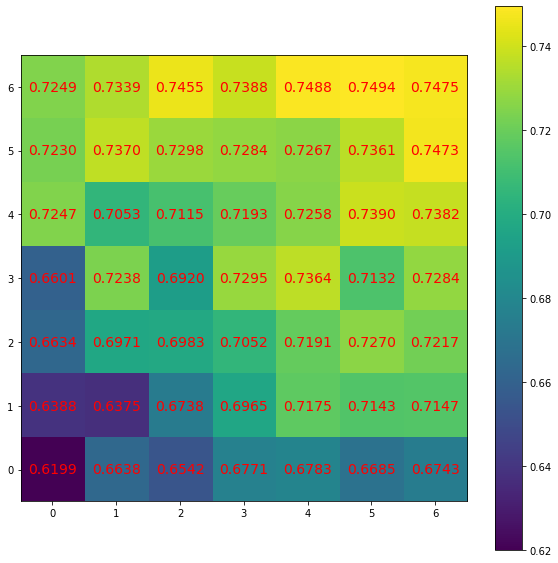

In [4]:
aucs, phis, fs = arch_scan("h2qq_R0.8_mH500.h5",Phi_depth=3,F_depth=3)
plt.figure(figsize=(10,10))
plt.imshow(aucs.T,origin='lower')
plt.colorbar()
for (i,j), val in np.ndenumerate(aucs):
    plt.text(i,j,"{0:.4f}".format(val),ha='center',va='center',color='red',fontsize=14)
scan_dict['depth_3'] = aucs

EFN AUC: 0.6861974470369357
EFN AUC: 0.6659259916324894
EFN AUC: 0.7151253756314923
EFN AUC: 0.7427697912736311
EFN AUC: 0.703326393265149
EFN AUC: 0.7468613888592537
EFN AUC: 0.7206278063743823
EFN AUC: 0.6833663640194056
EFN AUC: 0.7069548777804968
EFN AUC: 0.7409496531663409
EFN AUC: 0.7372957779286629
EFN AUC: 0.739544481906355
EFN AUC: 0.7696885118142025
EFN AUC: 0.7697126585490086
EFN AUC: 0.6723428787952153
EFN AUC: 0.7217744200425384
EFN AUC: 0.7202933845346338
EFN AUC: 0.743570018144543
EFN AUC: 0.7534944510001842
EFN AUC: 0.767067105474394
EFN AUC: 0.7685430593391798
EFN AUC: 0.698313365536825
EFN AUC: 0.7188320062728142
EFN AUC: 0.7187791191321444
EFN AUC: 0.7488863045272167
EFN AUC: 0.7625341687457712
EFN AUC: 0.7560773400115861
EFN AUC: 0.7423837531364588
EFN AUC: 0.72926903143363
EFN AUC: 0.7245122198006845
EFN AUC: 0.7371539772115441
EFN AUC: 0.7602373624987383
EFN AUC: 0.7559535958685297
EFN AUC: 0.7415380040291233
EFN AUC: 0.7590377272324919
EFN AUC: 0.7298615915456459

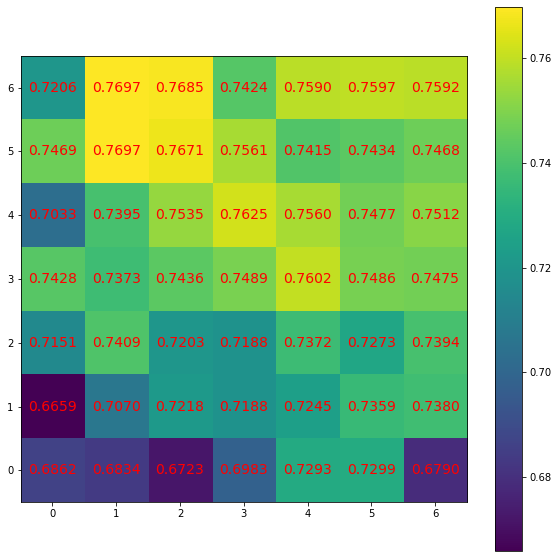

In [5]:
aucs, phis, fs = arch_scan("h2qq_R0.8_mH500.h5",Phi_depth=4,F_depth=4)
plt.figure(figsize=(10,10))
test = np.copy(aucs)
plt.imshow(test.T,origin='lower')
plt.colorbar()
for (i,j), val in np.ndenumerate(test):
    plt.text(i,j,"{0:.4f}".format(val),ha='center',va='center',color='red',fontsize=14)

# Dropout Scan

In [3]:
# try dropout scan
model_kwargs = {"Phi_sizes":(60,60,60), "F_sizes":(80,80,80),
                "latent_dropout":0,"F_dropouts":0,
                "input_dim":2,
                "output_dim":1,"output_act":"sigmoid",
                "loss":"binary_crossentropy",
                "summary":False}
train_kwargs = {"epochs":10,"verbose":0,"batch_size":10000}
dropouts = np.arange(0,0.30,0.05)
auc_grid = np.zeros((len(dropouts),len(dropouts)))
for i,dl in enumerate(dropouts):
    for j,df in enumerate(dropouts):
        m_kwargs = model_kwargs
        m_kwargs["latent_dropout"] = dl
        m_kwargs["F_dropouts"] = df
        efn, auc, efn_fp, efn_tp, threshs = train_efn("h2qq_R0.8_mH500.h5",m_kwargs,train_kwargs,plot=False)
        auc_grid[i,j] = auc
        del efn, auc, efn_fp, efn_tp, threshs

EFN AUC: 0.7632811431502229
EFN AUC: 0.7545750260931084
EFN AUC: 0.7399359192609277
EFN AUC: 0.7570531191093285
EFN AUC: 0.7804684586267115
EFN AUC: 0.7695912063572863
EFN AUC: 0.7533769583633273
EFN AUC: 0.7530448432129645
EFN AUC: 0.7607232493245304
EFN AUC: 0.7572338185207261
EFN AUC: 0.7446053771107004
EFN AUC: 0.7483421715348095
EFN AUC: 0.7507921867167169
EFN AUC: 0.744366747418962
EFN AUC: 0.7510369082912124
EFN AUC: 0.746031125237393
EFN AUC: 0.7423737330245848
EFN AUC: 0.742066914432806
EFN AUC: 0.7447055722811213
EFN AUC: 0.7345726715024696
EFN AUC: 0.7582408933171778
EFN AUC: 0.7515279058699419
EFN AUC: 0.749879269925429
EFN AUC: 0.7440319115335251
EFN AUC: 0.7462724929648153
EFN AUC: 0.7406818971478737
EFN AUC: 0.7513825304615436
EFN AUC: 0.7532501072726024
EFN AUC: 0.7446860209805919
EFN AUC: 0.7295984633569026
EFN AUC: 0.7452734971302479
EFN AUC: 0.7631942042424793
EFN AUC: 0.7226523154076172
EFN AUC: 0.7509299889310563
EFN AUC: 0.7483802742614738
EFN AUC: 0.7381141871743

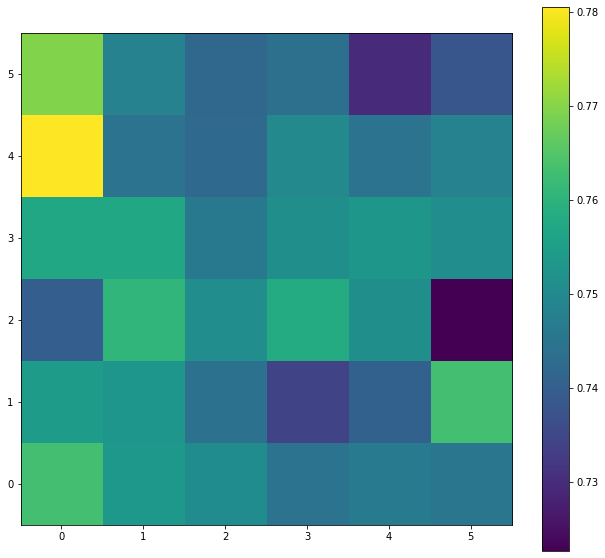

In [13]:
plt.figure(figsize=(11,10))
plt.imshow(auc_grid.T,origin='lower')
plt.colorbar()